In [1]:
from typing import List
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

candles csv from:

(a) https://github.com/r0bbar/siglab/blob/master/siglab_py/market_data_providers/ccxt_candles_ta_to_csv.py

(b) https://github.com/r0bbar/siglab/blob/master/siglab_py/market_data_providers/futu_candles_ta_to_csv.py

In [2]:
MAX_NUM_DAYS : int = 365*5
candles = pd.read_csv('candles_ta_BTC.csv')
candles['datetime'] = pd.to_datetime(candles['datetime'])
candles = candles.iloc[-MAX_NUM_DAYS*24:] # Trailing MAX_NUM_DAYS days
candles

,Unnamed: 0,exchange,symbol,timestamp_ms,open,high,low,close,volume,datetime,...,normalized_hurst_exp_slope,normalized_hurst_exp_slope_min,normalized_hurst_exp_slope_max,normalized_hurst_exp_slope_idmin,normalized_hurst_exp_slope_idmax,fib_0.618_short_periods,fib_0.618_long_periods,gap_close_vs_ema,close_above_or_below_ema,close_vs_ema_inflection
0,0,OKX,BTC/USDT:USDT,1672502400000,16591.6,16614.5,16586.0,16603.5,597.0300,2023-01-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0
1,1,OKX,BTC/USDT:USDT,1672506000000,16603.1,16604.7,16572.4,16578.7,844.3400,2023-01-01 01:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.816000,below,NaN
2,2,OKX,BTC/USDT:USDT,1672509600000,16579.8,16588.0,16572.6,16577.7,338.6400,2023-01-01 02:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21.910720,below,NaN
3,3,OKX,BTC/USDT:USDT,1672513200000,16578.3,16591.5,16569.2,16571.9,566.3800,2023-01-01 03:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-25.493862,below,NaN
4,4,OKX,BTC/USDT:USDT,1672516800000,16571.9,16576.4,16570.5,16571.5,174.4700,2023-01-01 04:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.822353,below,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22888,22888,OKX,BTC/USDT:USDT,1754899200000,121545.9,121838.0,121211.0,121695.0,2728.5146,2025-08-11 16:00:00,...,1.0,-0.768712,1.0,22816.0,22884.0,120888.5618,119657.135,1710.827166,above,NaN
22889,22889,OKX,BTC/USDT:USDT,1754902800000,121695.1,121729.3,121113.9,121444.3,1799.8320,2025-08-11 17:00:00,...,1.0,-0.768712,1.0,22816.0,22884.0,121979.2408,119657.135,1343.316993,above,NaN
22890,22890,OKX,BTC/USDT:USDT,1754906400000,121444.3,121472.0,120934.2,121189.8,2295.9015,2025-08-11 18:00:00,...,1.0,-0.768712,1.0,22816.0,22884.0,121882.0218,119825.849,1001.711634,above,NaN
22891,22891,OKX,BTC/USDT:USDT,1754910000000,121189.7,121297.1,120271.0,120563.0,6340.0870,2025-08-11 19:00:00,...,1.0,-0.768712,1.0,22816.0,22884.0,121642.5842,119825.849,344.918703,above,1.0


### Return and Sharpe

                    Strategy
------------------  ----------
Start Period        2023-01-01
End Period          2025-08-11
Risk-Free Rate      5.0%
Time in Market      100.0%

Cumulative Return   438.37%
CAGR﹪              56.07%

Sharpe              -0.34
Prob. Sharpe Ratio  0.0%
Sortino             -0.46
Sortino/√2          -0.33
Omega               0.93

Max Drawdown        -35.99%
Longest DD Days     242

Gain/Pain Ratio     0.29
Gain/Pain (1M)      2.46

Payoff Ratio        1.01
Profit Factor       1.06
Common Sense Ratio  1.07
CPC Index           0.55
Tail Ratio          1.02
Outlier Win Ratio   4.75
Outlier Loss Ratio  4.86

MTD                 1.41%
3M                  13.23%
6M                  16.57%
YTD                 17.88%
1Y                  76.6%
3Y (ann.)           56.07%
5Y (ann.)           56.07%
10Y (ann.)          56.07%
All-time (ann.)     56.07%

Avg. Drawdown       -2.5%
Avg. Drawdown Days  6
Recovery Factor     5.5
Ulcer Index         0.13
Serenity Index      0.

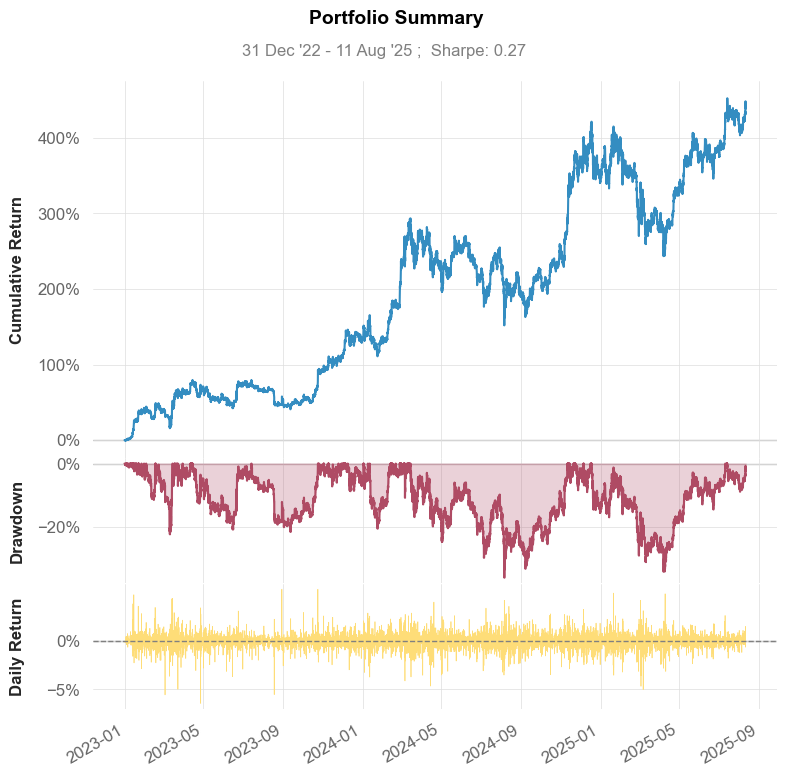

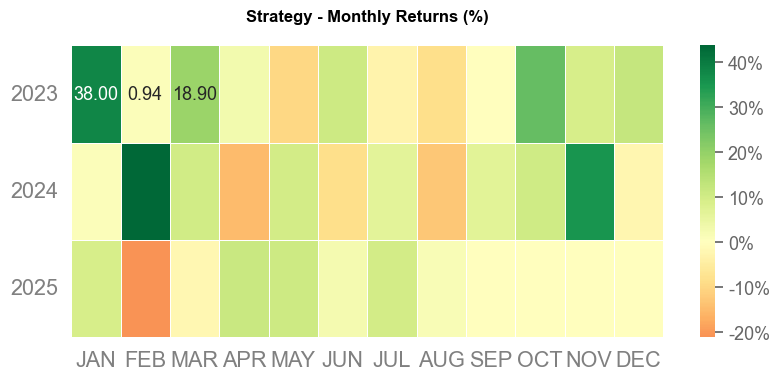

In [5]:
# https://github.com/ranaroussi/quantstats
%matplotlib inline
import quantstats as qs

RISK_FREE_RATE = 0.05 # 5%

candles.set_index('datetime', inplace=True)

qs.reports.basic(
    returns=candles[~pd.isna(candles.log_return)]['log_return'], 
    rf=RISK_FREE_RATE,
    title="Tear Sheet"
    )

### Indicators and Signals

In [7]:
# Read again
MAX_NUM_DAYS : int = 90
candles = pd.read_csv('candles_ta_BTC.csv')
candles['datetime'] = pd.to_datetime(candles['datetime'])
candles = candles.iloc[-MAX_NUM_DAYS*24:] # Trailing MAX_NUM_DAYS days

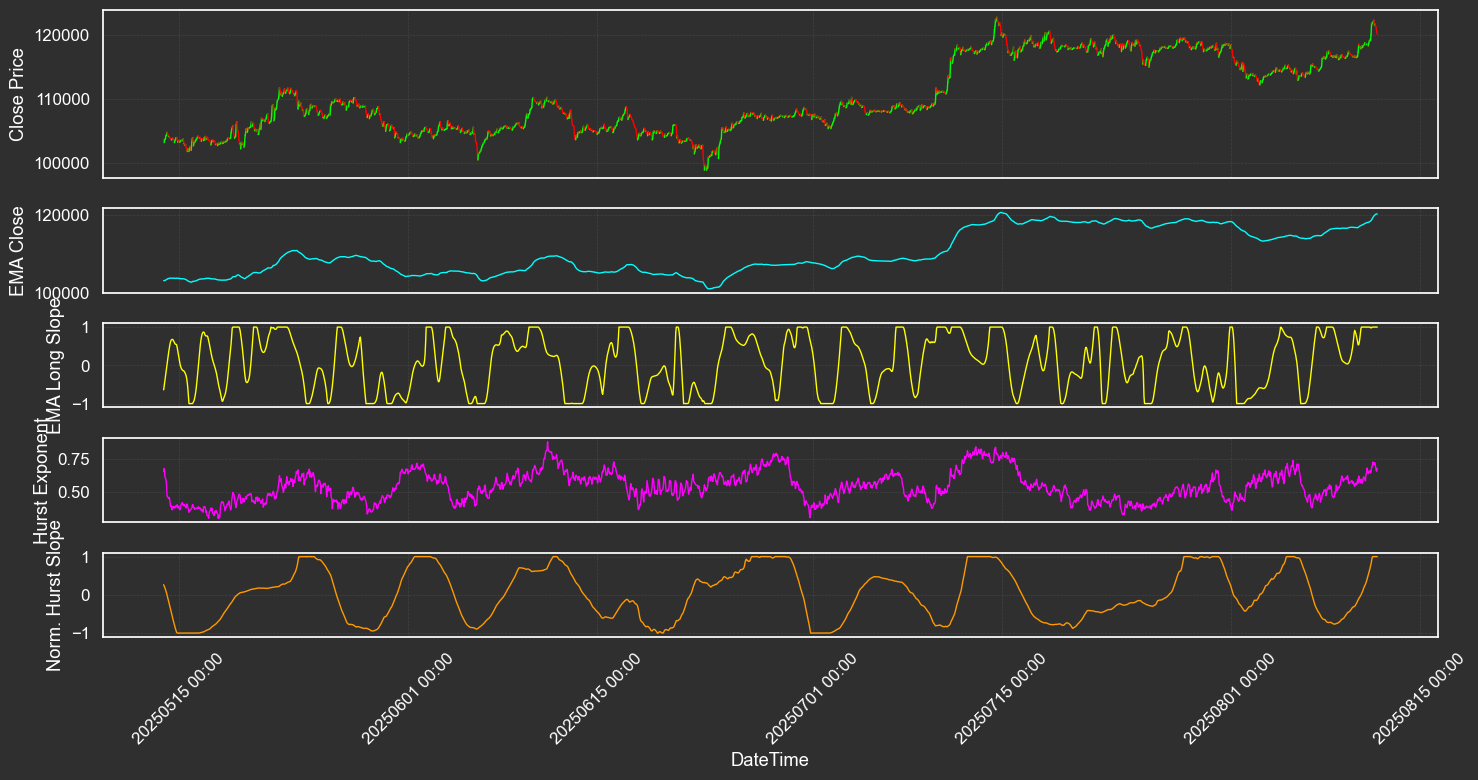

In [8]:
candles['color'] = ['#00FF00'] + ['#00FF00' if candles['close'].iloc[i] >= candles['close'].iloc[i-1] else '#FF0000' for i in range(1, len(candles))]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15, 8), facecolor='#2F2F2F', sharex=True, gridspec_kw={'height_ratios': [2, 1, 1, 1, 1]})

ax1.set_facecolor("#2F2F2F")
for i in range(1, len(candles)):
    ax1.plot(candles['datetime'].iloc[i-1:i+1], candles['close'].iloc[i-1:i+1], color=candles['color'].iloc[i], linewidth=1)
ax1.set_ylabel('Close Price', color='#FFFFFF')
ax1.tick_params(axis='y', colors='#FFFFFF')
ax1.grid(True, color='#555555', linestyle='--', alpha=0.5)

ax2.set_facecolor('#2F2F2F')
ax2.plot(candles['datetime'], candles['ema_close'], color='#00FFFF', linewidth=1)
ax2.set_ylabel('EMA Close', color='#FFFFFF')
ax2.tick_params(axis='y', colors='#FFFFFF')
ax2.grid(True, color='#555555', linestyle='--', alpha=0.5)

ax3.set_facecolor('#2F2F2F')
ax3.plot(candles['datetime'], candles['normalized_ema_long_slope'], color='#FFFF00', linewidth=1)
ax3.set_ylabel('EMA Long Slope', color='#FFFFFF')
ax3.tick_params(axis='y', colors='#FFFFFF')
ax3.grid(True, color='#555555', linestyle='--', alpha=0.5)

ax4.set_facecolor('#2F2F2F')
ax4.plot(candles['datetime'], candles['hurst_exp'], color='#FF00FF', linewidth=1)
ax4.set_ylabel('Hurst Exponent', color='#FFFFFF')
ax4.tick_params(axis='y', colors='#FFFFFF')
ax4.grid(True, color='#555555', linestyle='--', alpha=0.5)

ax5.set_facecolor('#2F2F2F')
ax5.plot(candles['datetime'], candles['normalized_hurst_exp_slope'], color='#FF9900', linewidth=1)
ax5.set_ylabel('Norm. Hurst Slope', color='#FFFFFF')
ax5.tick_params(axis='y', colors='#FFFFFF')
ax5.set_xlabel('DateTime', color='#FFFFFF')
ax5.tick_params(axis='x', colors='#FFFFFF', rotation=45)
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d %H:%M'))
ax5.grid(True, color='#555555', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()